# Exercício 1 da Lista

Primeiro, iremos codificar o polinômio de Lagrange e a Spline Cúbica Natural para o perfil superior da imagem do pato.

Polinômio de Lagrange:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [15]:
def lagrange_interpolation(x_points, y_points):
    n = len(x_points)
    
    x = sp.symbols('x')
    p = 0

    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if j != i:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        p += term
        
    p_simplified = sp.simplify(p)
    
    return p_simplified

Exemplo:

Polinômio de Lagrange:
                      20                        19                        18   ↪
- 3.074530780108e-11⋅x   + 4.27948927144623e-9⋅x   - 2.77283085046601e-7⋅x   + ↪

↪                       17                         16                        1 ↪
↪  1.11075895423629e-5⋅x   - 0.000308159189308446⋅x   + 0.00628589966751659⋅x  ↪

↪ 5                       14                     13                     12     ↪
↪   - 0.0976903800730432⋅x   + 1.18284031649908⋅x   - 11.3160515558666⋅x   + 8 ↪

↪                  11                     10                     9             ↪
↪ 6.2513979924859⋅x   - 525.812753506673⋅x   + 2564.20130819607⋅x  - 9968.9788 ↪

↪          8                     7                     6                     5 ↪
↪ 5733137⋅x  + 30677.6349740664⋅x  - 73866.5656784631⋅x  + 136777.900226635⋅x  ↪

↪                      4                    3                     2            ↪
↪  - 189850.972861702⋅x  + 189994.99323807⋅x  - 128683.405779067⋅x  + 52462.58 ↪


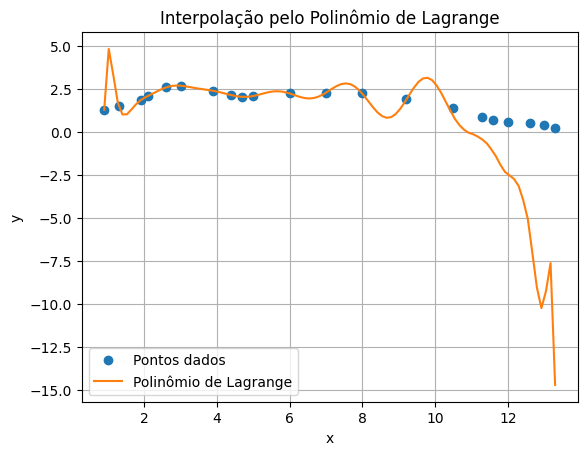

In [16]:
# Exemplo de uso
x_points = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
y_points = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Gera o polinômio de Lagrange simbólico
polynomial = lagrange_interpolation(x_points, y_points)

# Exibir o polinômio resultante
print("Polinômio de Lagrange:")
sp.pprint(polynomial)

# Valores que queremos interpolar
x_values = np.linspace(min(x_points), max(x_points), 100)
y_values = [polynomial.subs(sp.symbols('x'), x_val) for x_val in x_values]

# Plotando o resultado
plt.plot(x_points, y_points, 'o', label='Pontos dados')
plt.plot(x_values, y_values, label='Polinômio de Lagrange')
plt.legend()
plt.title('Interpolação pelo Polinômio de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()